import the necessary libraries.

In [2]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's load the file and see what the data looks like.

In [3]:
candy = pd.read_csv(r"D:\Data\candy-data.csv")

In [4]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [5]:
candy.shape

(85, 13)

In [6]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


Reporting data to know more details about it

# Exploratory Data Analysis

In [7]:
def count(feature):
    
    # Show the counts of observations in each categorical bin using bars
    sns.countplot(x=feature,data=candy)
    

In [8]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


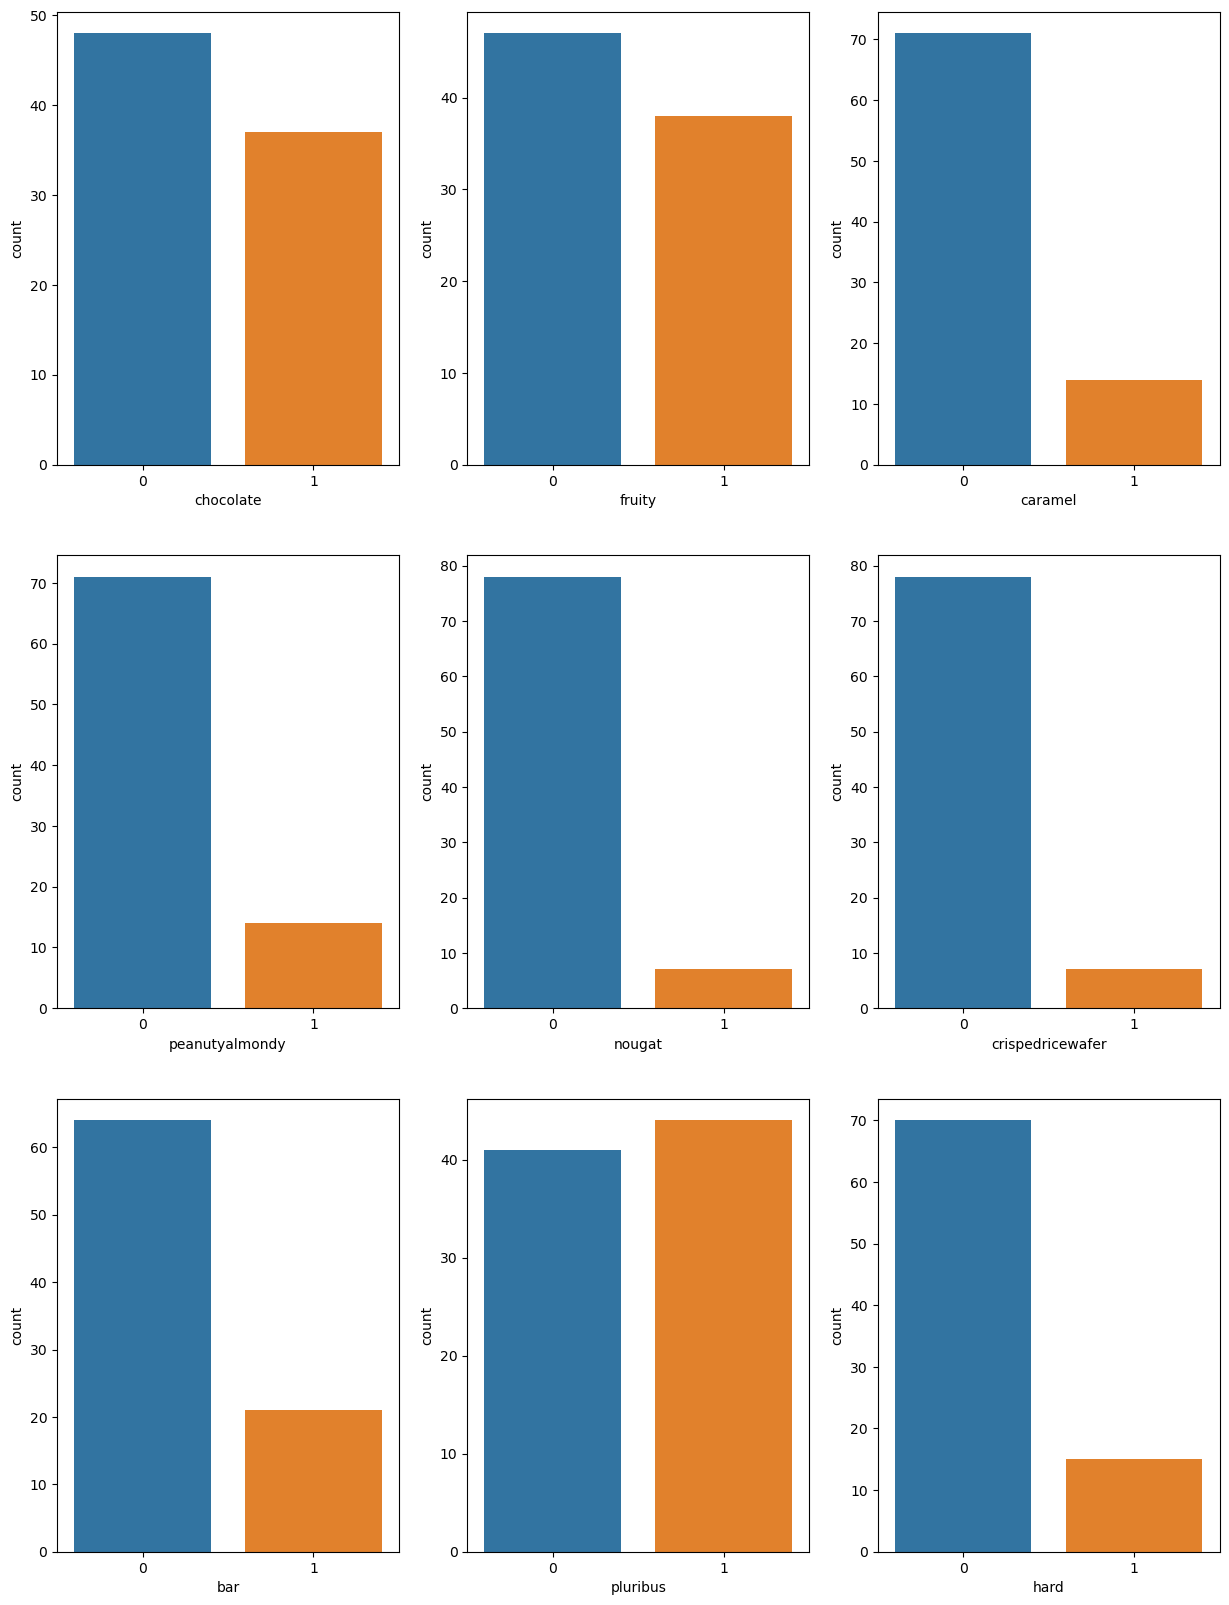

In [9]:
fig, ax = plt.subplots(3, 3,figsize=(15,20))
plt.subplot(3,3,1)
count('chocolate')
plt.subplot(3,3,2)
count('fruity')
plt.subplot(3,3,3)
count('caramel')
plt.subplot(3,3,4)
count('peanutyalmondy')
plt.subplot(3,3,5)
count('nougat')
plt.subplot(3,3,6)
count('crispedricewafer')
plt.subplot(3,3,7)
count('bar')
plt.subplot(3,3,8)
count('pluribus')
plt.subplot(3,3,9)
count('hard')

I can notice that most candies do not have a filling inside

The most common filling is chocolate and fruit

### Let's find out the percentages

In [10]:
def box(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxplot(x="chocolate", y=var, data=candy,palette='rainbow')

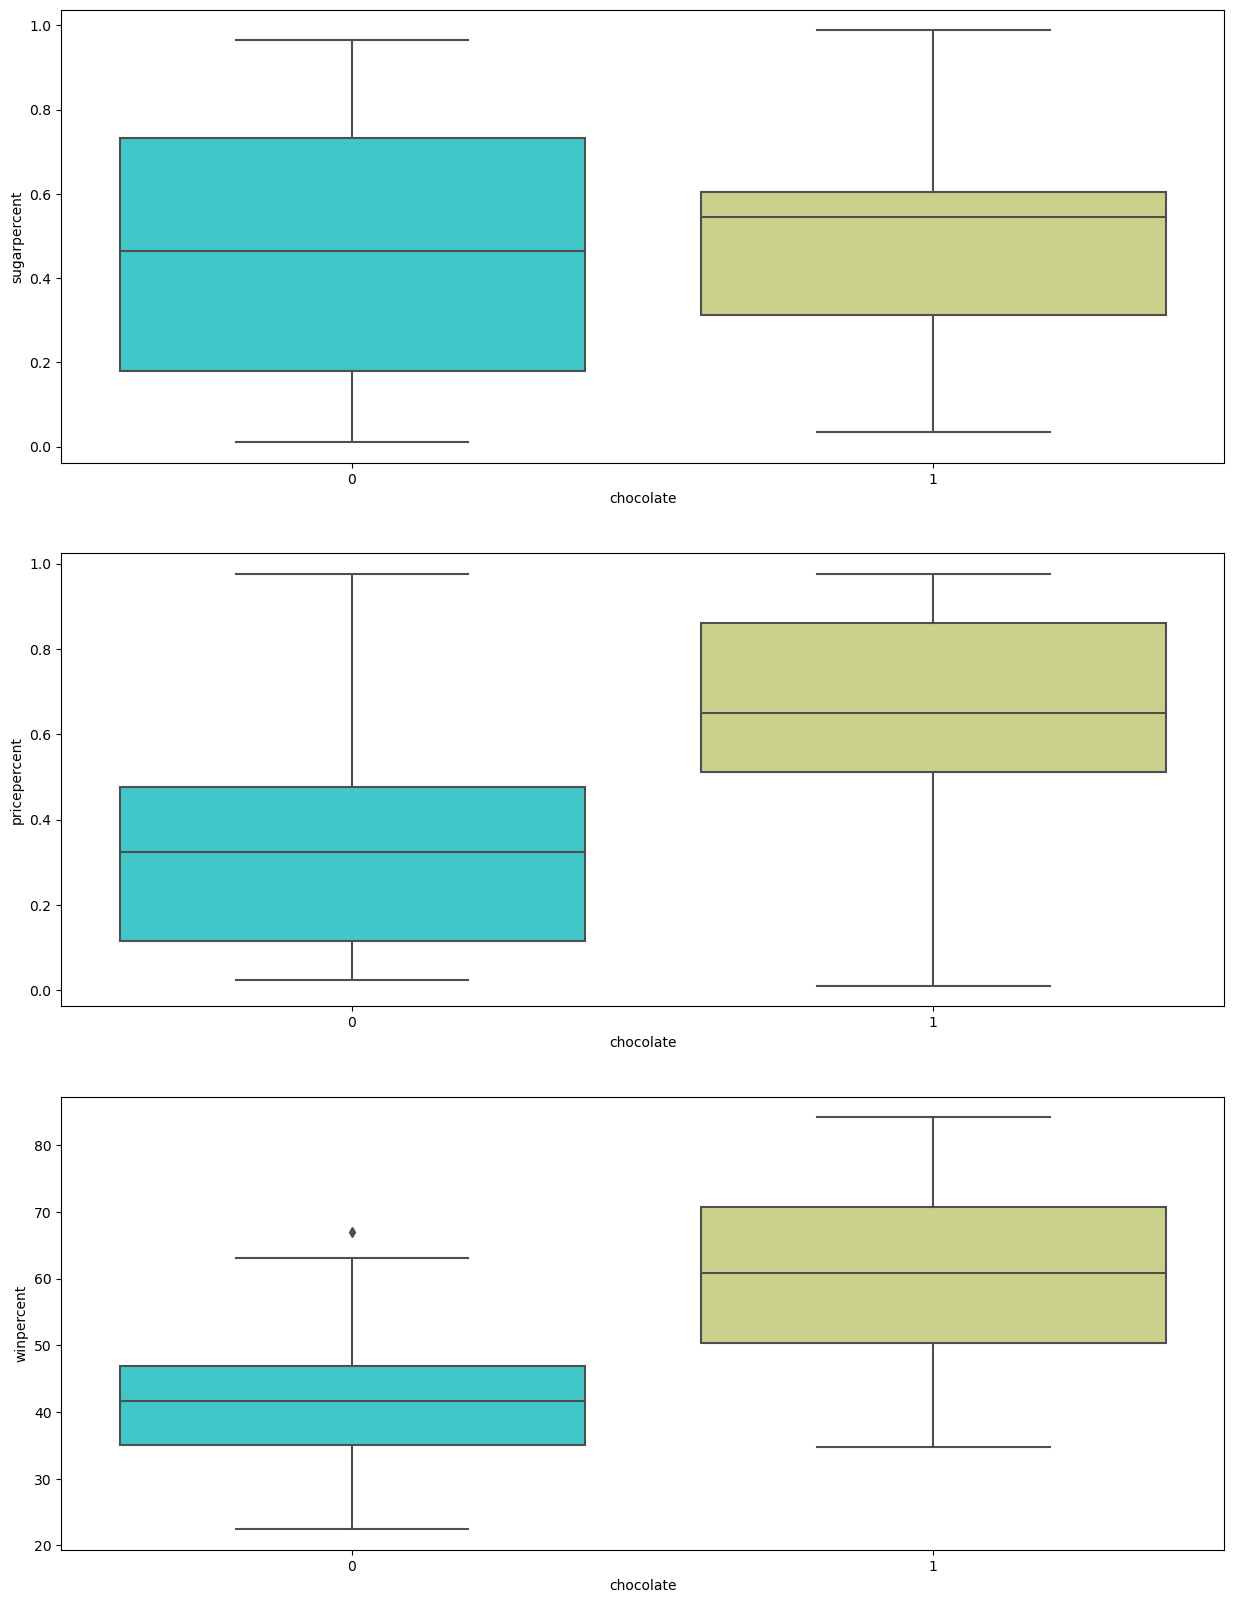

In [11]:
fig, ax = plt.subplots(3, 1,figsize=(15,20))
plt.subplot(3,1,1)
box('sugarpercent')
plt.subplot(3,1,2)
box('pricepercent')
plt.subplot(3,1,3)
box('winpercent')

We can see that the dessert that contains chocolate has an average sugar level,

more expensive than the rest,

and the percentage of winning it according to the larger matching cases

In [12]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


# Feature Selection

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 8 features for the dataset.

[0.36482437 0.01766924 0.04922576 0.0159754  0.023182   0.04705652
 0.12074432 0.03154048 0.08525298 0.0819112  0.16261773]


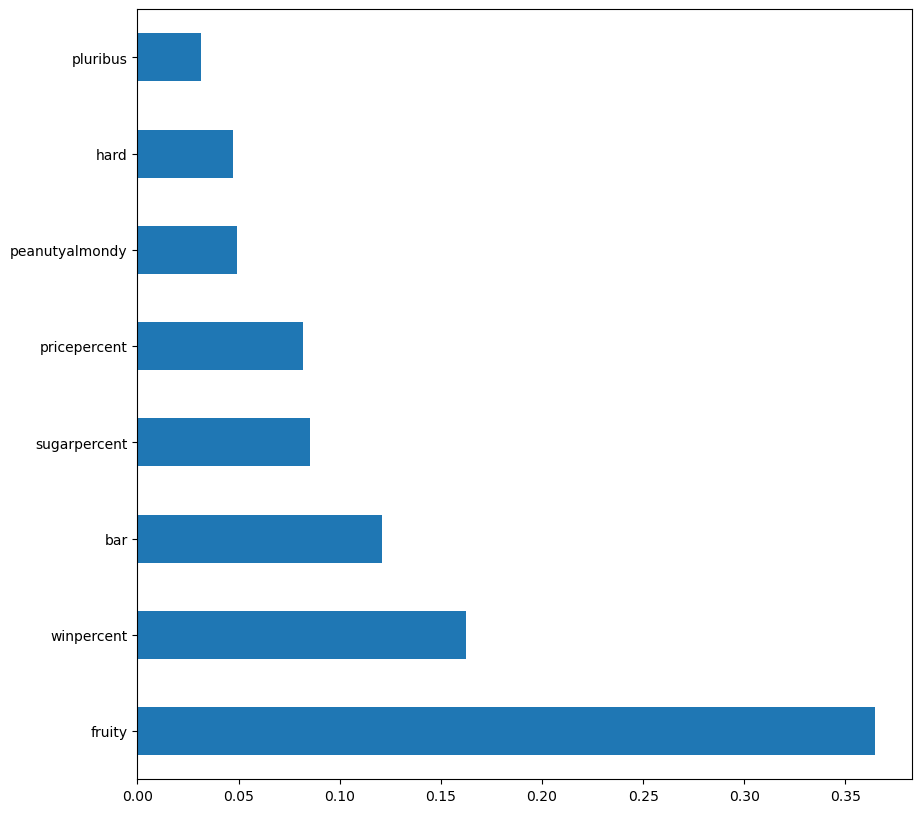

In [13]:
X = candy.drop(['chocolate','competitorname'],axis=1) #independent columns
y = candy['chocolate']   #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

Now we can see the 8 most important variables in this data

# Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features 

C:\Users\HP\AppData\Local\Temp\ipykernel_21324\4263624689.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(candy.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=4)


<Axes: >

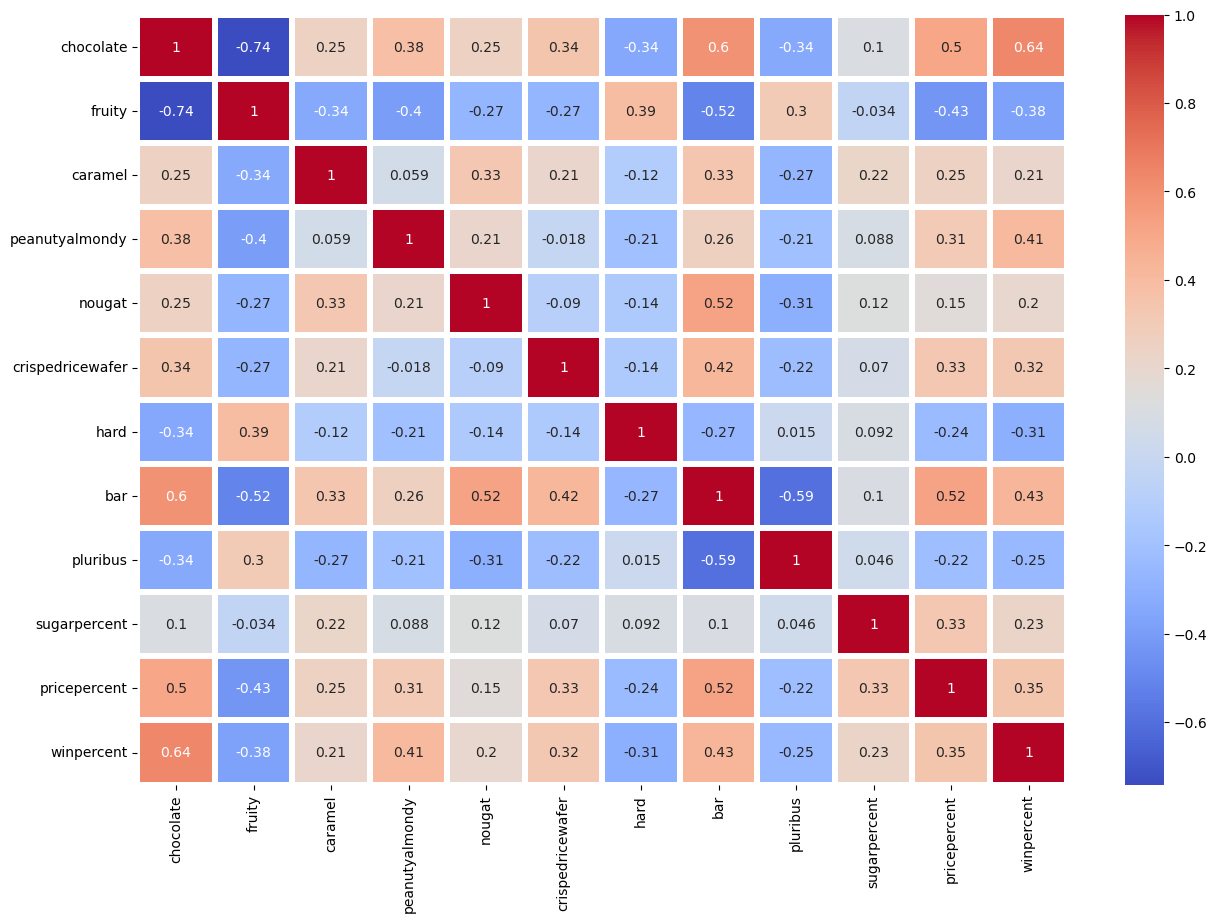

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(candy.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=4)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [15]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [16]:
competitorname = pd.get_dummies(candy['competitorname'],drop_first=True)

In [17]:
candy.drop('competitorname',axis=1,inplace=True)

In [18]:
candy=pd.concat([candy,competitorname],axis=1)

In [19]:
candy.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,...,Tootsie Roll Juniors,Tootsie Roll Midgies,Tootsie Roll Snack Bars,Trolli Sour Bites,Twix,Twizzlers,Warheads,WelchÕs Fruit Snacks,WertherÕs Original Caramel,Whoppers
0,1,0,1,0,0,1,0,1,0,0.732,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0.604,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.011,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.011,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0.906,...,0,0,0,0,0,0,0,0,0,0


# Building a Logistic Regression model

### Training and Testing Data

In [20]:
X = candy.drop('chocolate',axis=1)
y = candy['chocolate']

In [21]:
#spliting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(X,y, test_size = 0.2 , random_state=4)

# Training and Predicting

In [22]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

### fit the model

In [23]:
log.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
predictions = log.predict(X_test)

Let's move on to evaluate our model!

# Evaluation

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.86      0.92         7

    accuracy                           0.94        17
   macro avg       0.95      0.93      0.94        17
weighted avg       0.95      0.94      0.94        17



In [27]:
confusion_matrix(y_test,predictions)

array([[10,  0],
       [ 1,  6]], dtype=int64)

In [28]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9411764705882353


# model is ready

I hope you enjoy this study and I would appreciate if you add your comments below.

Seif Mohamed